Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


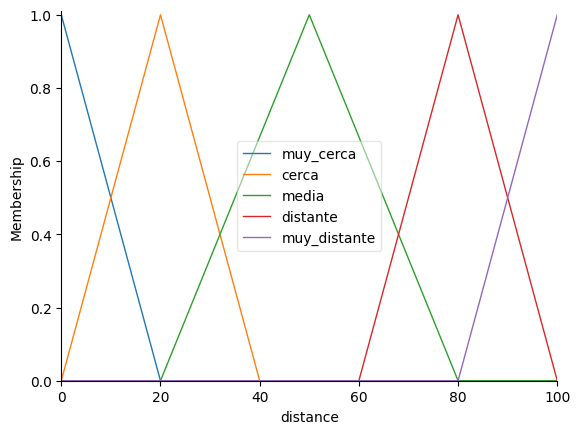

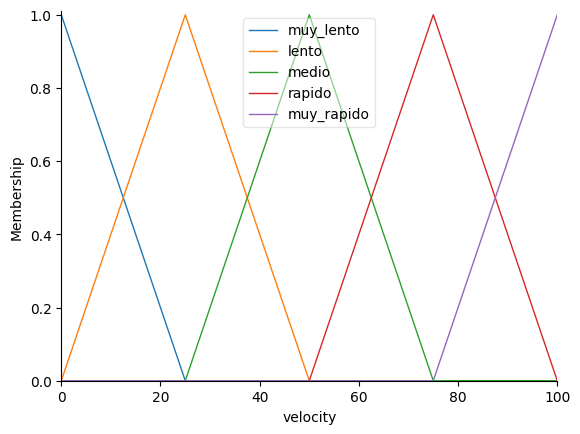

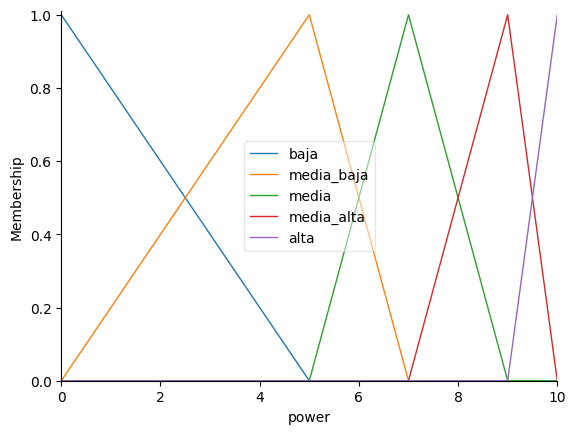

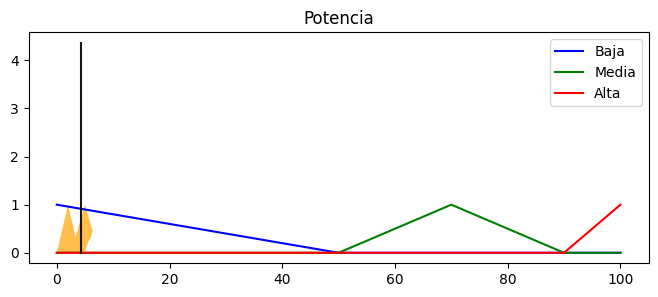

In [19]:
!pip install scikit-fuzzy  # Instalar scikit-fuzzy si no está instalado

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


# Crear universo de variables
universe = np.linspace(0, 100, 101)

# Crear funciones de membresía
membership_function = fuzz.trimf(universe, [40, 50, 60])

# Crear universo para variable de entrada "distance"
distance_universe = np.linspace(0, 100, 101)

# Crear variable de entrada "distance" con su función de membresía
distance = fuzz.trimf(distance_universe, [10, 50, 90])

# Crear universo para variable de salida "power"
power_universe = np.linspace(0, 100, 101)

# Crear variable de salida "power" con su función de membresía
power = fuzz.trimf(power_universe, [10, 50, 90])

# Definir valores de entrada actuales
current_distance = 10  # Reemplazar con el valor real de distancia en el sistema
current_velocity = 50  # Reemplazar con el valor real de velocidad en el sistema

# Crear universos para las variables lingüísticas
distance_universe = np.linspace(0, 100, 101)
velocity_universe = np.linspace(0, 100, 101)
power_universe = np.linspace(0, 10, 101)

# Crear variables lingüísticas para distancia, velocidad y potencia
distance = ctrl.Antecedent(distance_universe, 'distance')
velocity = ctrl.Antecedent(velocity_universe, 'velocity')
power = ctrl.Consequent(power_universe, 'power')

# Definir funciones de membresía para las variables lingüísticas
distance['muy_cerca'] = fuzz.trimf(distance_universe, [0, 0, 20])
distance['cerca'] = fuzz.trimf(distance_universe, [0, 20, 40])
distance['media'] = fuzz.trimf(distance_universe, [20, 50, 80])
distance['distante'] = fuzz.trimf(distance_universe, [60, 80, 100])
distance['muy_distante'] = fuzz.trimf(distance_universe, [80, 100, 100])

velocity['muy_lento'] = fuzz.trimf(velocity_universe, [0, 0, 25])
velocity['lento'] = fuzz.trimf(velocity_universe, [0, 25, 50])
velocity['medio'] = fuzz.trimf(velocity_universe, [25, 50, 75])
velocity['rapido'] = fuzz.trimf(velocity_universe, [50, 75, 100])
velocity['muy_rapido'] = fuzz.trimf(velocity_universe, [75, 100, 100])

power['baja'] = fuzz.trimf(power_universe, [0, 0, 5])
power['media_baja'] = fuzz.trimf(power_universe, [0, 5, 7])
power['media'] = fuzz.trimf(power_universe, [5, 7, 9])
power['media_alta'] = fuzz.trimf(power_universe, [7, 9, 10])
power['alta'] = fuzz.trimf(power_universe, [9, 10, 10])

# Visualizar las funciones
# Visualizar las funciones de membresía
distance.view()
velocity.view()
power.view()

# Definir las reglas del sistema difuso
# Regla 1: Si la distancia es muy cercana entonces la potencia es alta
rule1 = distance['muy_cerca'].mf
power_high = np.fmin(rule1, power['alta'].mf)

# Regla 2: Si la distancia es cercana Y la velocidad es muy lenta entonces la potencia es baja
rule2 = np.fmin(distance['cerca'].mf, velocity['muy_lento'].mf)
power_low = np.fmin(rule2, power['baja'].mf)

# Regla 3: Si la velocidad es óptima entonces aumente la potencia ligeramente
rule3 = velocity['medio']
power_increase = np.fmin(rule3.mf, np.full_like(power['media'].mf, 1))

# Regla 4: Si la velocidad es óptima Y la distancia es distante entonces no cambie la potencia suministrada
rule4 = distance['distante'].mf + velocity['medio'].mf
rule4_values = np.clip(np.fmax(rule1, rule4), 0, 1)
power_no_change = rule4_values * power['media'].mf

# Regla 5: Si la distancia es cercana entonces disminuya la potencia ligeramente
rule5 = distance['cerca']
power_decrease = np.fmin(rule5.mf, np.full_like(power['media'].mf, 1))

# Combinar las reglas
aggregated = np.fmax(power_increase, np.fmax(power_no_change, power_decrease))

# Calcular el resultado final
result = fuzz.defuzz(power.universe, aggregated, 'centroid')


# Visualice el resultado final
#power_level_activation = fuzz.interp_membership(power.universe, aggregated, power_level)
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(power['baja'].mf, 'b', linewidth=1.5, label='Baja')
ax0.plot(power['media'].mf, 'g', linewidth=1.5, label='Media')
ax0.plot(power['alta'].mf, 'r', linewidth=1.5, label='Alta')
ax0.fill_between(power.universe, power_no_change, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([result, result], [0, result], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Potencia')
ax0.legend()
plt.show()
